## Time Series EDA

### Topics
EDA with Time Series

Mean Average (Rolling Window)

Financial terminologies:

    Error Trend Seasonality (ETS)

    Exponential Weighted Moving Average (EWMA)

    Auto Correlation Plot (ACF)

    Partial Auto Correlation Plot (PACF)

    ARIMAX -> Auto Regressor Integrated Moving Average

    SARIMAX -> Seasonal Auto Regressor Integrated Moving Average

    Fbprophet - Time series Forecasting - from facebook

Deep Learning - Time Series

RNN, GRU, LSTM, Bidirectional, CNN-LSTM(encoder-decoder)

### Topics Covered 
pandas datareader

datetime index

Time 'resampling'

Time Shifts

Mean rolling and expanding

Time Series Visualization

### pandas-datareader

In [1]:
!pip install pandas-datareader

In [2]:
import pandas as pd
import pandas_datareader as pdr   # to accessing data from pandas datareader
from datetime import datetime     # important libraries for time-series forecasting

import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
pdr.get_data_yahoo('TSLA')    # getting data from yahoo finance -  Tesla Share Price for last 5 years

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001
2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000
2017-03-10,49.299999,48.599998,49.242001,48.737999,15331500.0,48.737999
...,...,...,...,...,...,...
2022-02-28,876.859985,814.710022,815.010010,870.429993,33002300.0,870.429993
2022-03-01,889.880005,853.780029,869.679993,864.369995,24922300.0,864.369995
2022-03-02,886.479980,844.270020,872.130005,879.890015,24881100.0,879.890015


In [4]:
df_tesla = pdr.get_data_yahoo('TSLA')   # save it in dataframe df_tesla

In [5]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-03-06 to 2022-03-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1260 non-null   float64
 1   Low        1260 non-null   float64
 2   Open       1260 non-null   float64
 3   Close      1260 non-null   float64
 4   Volume     1260 non-null   float64
 5   Adj Close  1260 non-null   float64
dtypes: float64(6)
memory usage: 68.9 KB


In [6]:
df_tesla.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03,1260.000000
mean,286.879687,273.810787,280.609742,280.663212,4.467555e+07,280.663212
std,328.767749,313.308551,321.497745,321.326515,3.011057e+07,321.326515
min,37.335999,35.397999,36.220001,35.793999,9.800600e+06,35.793999
25%,61.895001,59.906500,61.060500,61.125998,2.519475e+07,61.125998
50%,71.897003,69.876999,70.824001,70.778000,3.493900e+07,70.778000
75%,590.514984,555.580002,574.527496,571.977509,5.207212e+07,571.977509
max,1243.489990,1217.000000,1234.410034,1229.910034,3.046940e+08,1229.910034


In [7]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001
2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000
2017-03-10,49.299999,48.599998,49.242001,48.737999,15331500.0,48.737999


In [8]:
df_tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-28,876.859985,814.710022,815.010010,870.429993,33002300.0,870.429993
2022-03-01,889.880005,853.780029,869.679993,864.369995,24922300.0,864.369995
2022-03-02,886.479980,844.270020,872.130005,879.890015,24881100.0,879.890015
2022-03-03,886.440002,832.599976,878.770020,839.289978,20373300.0,839.289978
2022-03-04,855.650024,825.160889,849.099976,838.289978,22294195.0,838.289978


<AxesSubplot:xlabel='Date'>

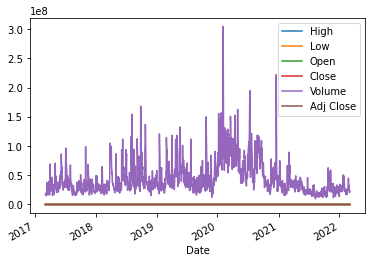

In [9]:
df_tesla.plot()

<AxesSubplot:xlabel='Date'>

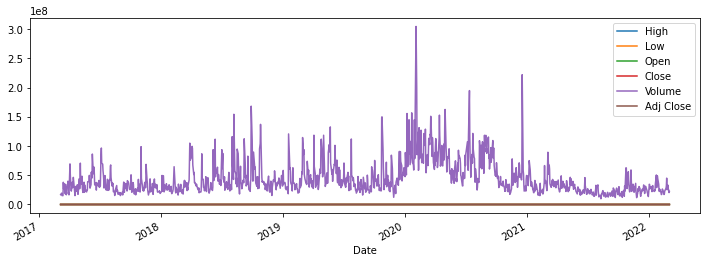

In [12]:
df_tesla.plot(figsize =(12,4))

<AxesSubplot:xlabel='Date'>

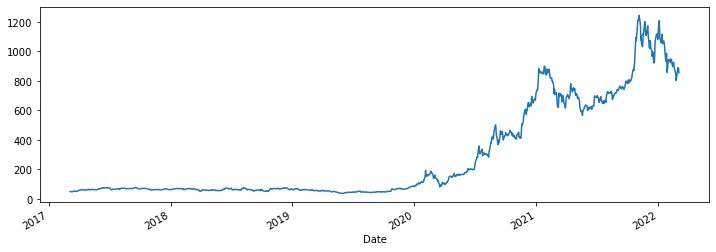

In [13]:
df_tesla['High'].plot(figsize =(12,4))

<AxesSubplot:xlabel='Date'>

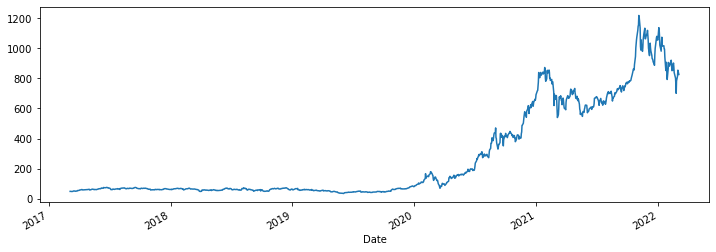

In [14]:
df_tesla['Low'].plot(figsize =(12,4))

<AxesSubplot:xlabel='Date'>

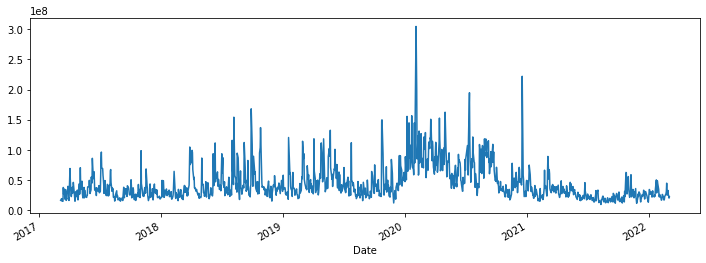

In [15]:
df_tesla['Volume'].plot(figsize =(12,4))

<AxesSubplot:xlabel='Date'>

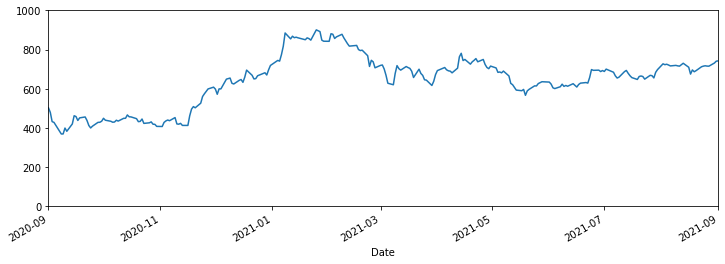

In [16]:
# xlimit and ylimit - to see the graph for particular time limits

df_tesla['High'].plot(figsize =(12,4), xlim =['2020-09-01', '2021-09-01'], ylim= (0,1000))

<AxesSubplot:xlabel='Date'>

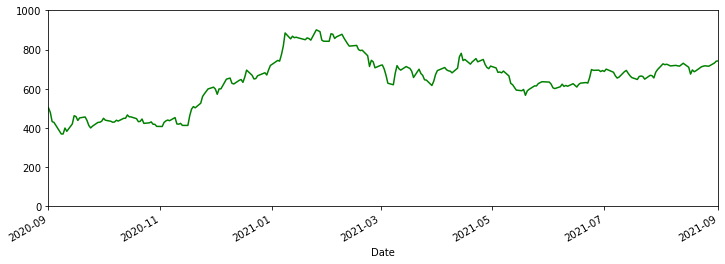

In [17]:
# add color

df_tesla['High'].plot(figsize =(12,4), xlim =['2020-09-01', '2021-09-01'], ylim= (0,1000), c='green')

<AxesSubplot:xlabel='Date'>

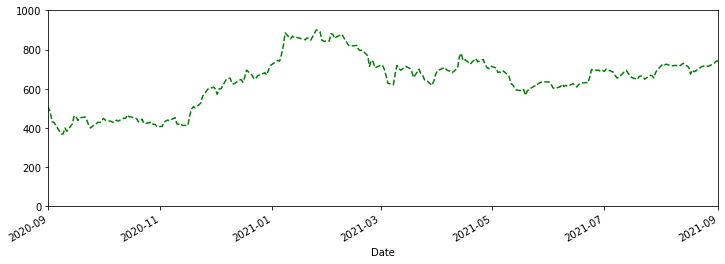

In [18]:
# add linestyle

df_tesla['High'].plot(figsize =(12,4), xlim =['2020-09-01', '2021-09-01'], ylim= (0,1000), c='green', ls='--')

In [19]:
df_tesla.index

DatetimeIndex(['2017-03-06', '2017-03-07', '2017-03-08', '2017-03-09',
               '2017-03-10', '2017-03-13', '2017-03-14', '2017-03-15',
               '2017-03-16', '2017-03-17',
               ...
               '2022-02-18', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-28', '2022-03-01', '2022-03-02',
               '2022-03-03', '2022-03-04'],
              dtype='datetime64[ns]', name='Date', length=1260, freq=None)

In [20]:
# 'loc' is to read from rows

df_tesla.loc['2020-01-01':'2021-09-01']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001
...,...,...,...,...,...,...
2021-08-26,715.400024,697.619995,708.309998,701.159973,13214300.0,701.159973
2021-08-27,715.000000,702.099976,705.000000,711.919983,13762100.0,711.919983
2021-08-30,731.000000,712.729980,714.719971,730.909973,18604200.0,730.909973


In [21]:
df_tesla.loc['2020-01-01':'2021-09-01'].index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=421, freq=None)

In [22]:
index = df_tesla.loc['2020-01-01':'2021-09-01'].index

In [23]:
df_tesla.loc['2020-01-01':'2021-09-01']['Open']

Date
2020-01-02     84.900002
2020-01-03     88.099998
2020-01-06     88.094002
2020-01-07     92.279999
2020-01-08     94.739998
                 ...    
2021-08-26    708.309998
2021-08-27    705.000000
2021-08-30    714.719971
2021-08-31    733.000000
2021-09-01    734.080017
Name: Open, Length: 421, dtype: float64

In [24]:
share_open = df_tesla.loc['2020-01-01':'2021-09-01']['Open']

In [25]:
share_open.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=421, freq=None)

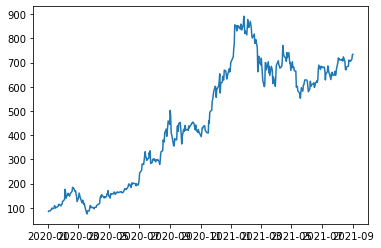

In [26]:
# Making subplots using matplotlib

fig, axis = plt.subplots()
axis.plot(index,share_open)

# analyse date overlapping issue

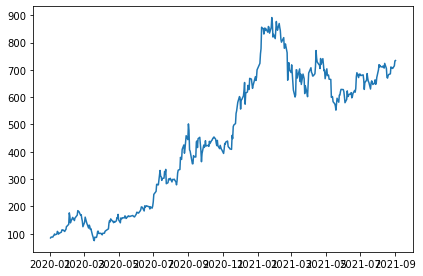

In [27]:
# overcome date overlapping above

fig, axis = plt.subplots()
plt.tight_layout()
axis.plot(index,share_open)

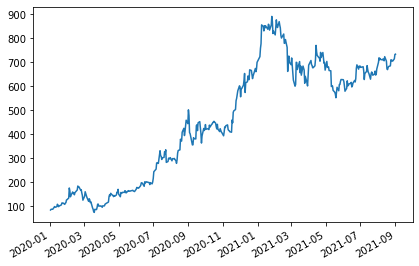

In [28]:
# Fixing more overlapping issues

fig, axis = plt.subplots()
plt.tight_layout()
#preventing overlapping
fig.autofmt_xdate()
axis.plot(index,share_open)

In [29]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-03-06 to 2022-03-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1260 non-null   float64
 1   Low        1260 non-null   float64
 2   Open       1260 non-null   float64
 3   Close      1260 non-null   float64
 4   Volume     1260 non-null   float64
 5   Adj Close  1260 non-null   float64
dtypes: float64(6)
memory usage: 101.2 KB


In [30]:
df_tesla = df_tesla.reset_index()

In [31]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1260 non-null   datetime64[ns]
 1   High       1260 non-null   float64       
 2   Low        1260 non-null   float64       
 3   Open       1260 non-null   float64       
 4   Close      1260 non-null   float64       
 5   Volume     1260 non-null   float64       
 6   Adj Close  1260 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 69.0 KB


### In most of the dataset, datetime is in object format(string), so we need to convert that

In [32]:
# Setting the date to the original format as a index
df_tesla.set_index(df_tesla['Date'])

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2017-03-06,2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001
2017-03-07,2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999
2017-03-08,2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001
2017-03-09,2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000
2017-03-10,2017-03-10,49.299999,48.599998,49.242001,48.737999,15331500.0,48.737999
...,...,...,...,...,...,...,...
2022-02-28,2022-02-28,876.859985,814.710022,815.010010,870.429993,33002300.0,870.429993
2022-03-01,2022-03-01,889.880005,853.780029,869.679993,864.369995,24922300.0,864.369995
2022-03-02,2022-03-02,886.479980,844.270020,872.130005,879.890015,24881100.0,879.890015


### You can see index as date as well for that we need to drop the Date column

In [33]:
df_tesla.set_index('Date', drop=True)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001
2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000
2017-03-10,49.299999,48.599998,49.242001,48.737999,15331500.0,48.737999
...,...,...,...,...,...,...
2022-02-28,876.859985,814.710022,815.010010,870.429993,33002300.0,870.429993
2022-03-01,889.880005,853.780029,869.679993,864.369995,24922300.0,864.369995
2022-03-02,886.479980,844.270020,872.130005,879.890015,24881100.0,879.890015


In [34]:
#Assign it to same dataframe
df_tesla = df_tesla.set_index('Date', drop=True)

In [35]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001
2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000
2017-03-10,49.299999,48.599998,49.242001,48.737999,15331500.0,48.737999


In [36]:
df_tesla = pd.to_datetime(df_tesla['Date'])

KeyError: 'Date'

In [39]:
# Another method to change it to datetime
pd.to_datetime(df_tesla['Date'])

0      2017-03-06
1      2017-03-07
2      2017-03-08
3      2017-03-09
4      2017-03-10
          ...    
1255   2022-02-28
1256   2022-03-01
1257   2022-03-02
1258   2022-03-03
1259   2022-03-04
Name: Date, Length: 1260, dtype: datetime64[ns]

In [40]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1260 non-null   datetime64[ns]
 1   High       1260 non-null   float64       
 2   Low        1260 non-null   float64       
 3   Open       1260 non-null   float64       
 4   Close      1260 non-null   float64       
 5   Volume     1260 non-null   float64       
 6   Adj Close  1260 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 69.0 KB


### Datetime object - very important

In [41]:
from datetime import datetime

In [42]:
datetime(2021, 11, 21) # yyyy, mm, dd, hh, mm, ss

datetime.datetime(2021, 11, 21, 0, 0)

In [43]:
datetime.now()

datetime.datetime(2022, 3, 5, 11, 14, 33, 621967)

In [44]:
start_time = datetime.now()
for i in range(1,10):
    res = i*23111111
    print(res)

end_time = datetime.now()
print(end_time-start_time, sep =',')

23111111
46222222
69333333
92444444
115555555
138666666
161777777
184888888
207999999
0:00:00.005152


In [45]:
date = datetime(2021, 11, 21)

In [46]:
date.date()

datetime.date(2021, 11, 21)

In [47]:
date.day

21

In [48]:
date.weekday()

6

In [49]:
date.year

2021

In [50]:
date.month

11

In [52]:
date.now()

datetime.datetime(2022, 3, 5, 11, 17, 28, 872569)

### Time Resampling

In [53]:
df_tesla.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001
1,2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999
2,2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001
3,2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000
4,2017-03-10,49.299999,48.599998,49.242001,48.737999,15331500.0,48.737999


In [54]:
df_tesla = df_tesla.set_index('Date', drop=True)

In [55]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001
2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000
2017-03-10,49.299999,48.599998,49.242001,48.737999,15331500.0,48.737999


In [56]:
# rule ='A' -> Year end Frequency

df_tesla.resample(rule='A')

In [57]:
df_tesla.resample(rule='A').min()   # Every year last day calucation

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,49.299999,48.556000,48.964001,48.737999,15113000.0,48.737999
2018-12-31,52.066002,48.917999,50.556000,50.112000,15403500.0,50.112000
2019-12-31,37.335999,35.397999,36.220001,35.793999,12328000.0,35.793999
2020-12-31,80.972000,70.101997,74.940002,72.244003,17357700.0,72.244003
2021-12-31,566.210022,539.489990,552.549988,563.000000,9800600.0,563.000000
2022-12-31,802.479980,700.000000,700.390015,764.039978,16909700.0,764.039978


In [58]:
df_tesla.resample(rule='A').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,77.921997,75.870003,77.337997,77.000000,98957000.0,77.000000
2018-12-31,77.491997,73.424004,75.000000,75.914001,168248500.0,75.914001
2019-12-31,87.061996,85.269997,87.000000,86.188004,150030500.0,86.188004
2020-12-31,718.719971,691.119995,699.989990,705.669983,304694000.0,705.669983
2021-12-31,1243.489990,1217.000000,1234.410034,1229.910034,89396500.0,1229.910034
2022-12-31,1208.000000,1136.040039,1189.550049,1199.780029,50521900.0,1199.780029


In [59]:
type(df_tesla.resample(rule='A').max())

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='Date'>

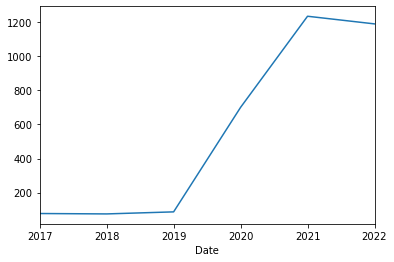

In [60]:
df_tesla.resample(rule='A').max()['Open'].plot()

In [82]:
# # rule ='QS' -> Quaterly Start Frequency

df_tesla.resample(rule='QS').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,56.400002,55.442001,55.745998,55.660000,39938000.0,55.660000
2017-04-01,77.398003,75.870003,77.337997,76.690002,86307000.0,76.690002
2017-07-01,77.921997,75.536003,76.050003,77.000000,96622500.0,77.000000
2017-10-01,72.599998,70.825996,71.396004,71.930000,98957000.0,71.930000
2018-01-01,72.099998,70.472000,72.000000,71.484001,105007000.0,71.484001
2018-04-01,74.746002,70.900002,73.031998,74.166000,111737000.0,74.166000
2018-07-01,77.491997,73.424004,73.818001,75.914001,168248500.0,75.914001
2018-10-01,75.898003,73.349998,75.000000,75.358002,137127500.0,75.358002
2019-01-01,70.400002,68.830002,69.241997,69.461998,120754000.0,69.461998


<AxesSubplot:xlabel='Date'>

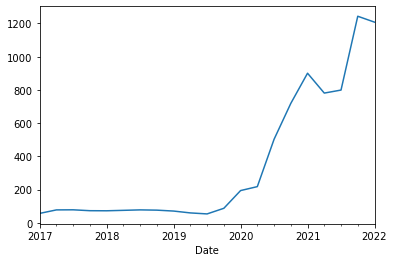

In [83]:
df_tesla.resample(rule='QS').max()['High'].plot()

In [61]:
# rule ='A' -> Business End Frequency

df_tesla.resample(rule='BQS').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,56.400002,55.442001,55.745998,55.660000,39938000.0,55.660000
2017-04-03,77.398003,75.870003,77.337997,76.690002,86307000.0,76.690002
2017-07-03,77.921997,75.536003,76.050003,77.000000,96622500.0,77.000000
2017-10-02,72.599998,70.825996,71.396004,71.930000,98957000.0,71.930000
2018-01-01,72.099998,70.472000,72.000000,71.484001,105007000.0,71.484001
2018-04-02,74.746002,70.900002,73.031998,74.166000,111737000.0,74.166000
2018-07-02,77.491997,73.424004,73.818001,75.914001,168248500.0,75.914001
2018-10-01,75.898003,73.349998,75.000000,75.358002,137127500.0,75.358002
2019-01-01,70.400002,68.830002,69.241997,69.461998,120754000.0,69.461998


<AxesSubplot:xlabel='Date'>

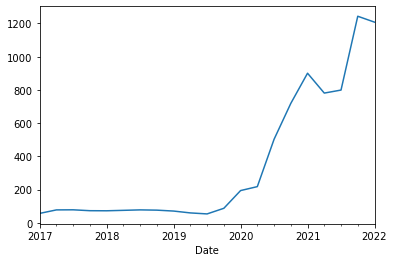

In [62]:
df_tesla.resample(rule='BQS').max()['High'].plot()

In [63]:
df_tesla['Open'].resample(rule='BA').mean()

Date
2017-12-29     65.436526
2018-12-31     63.436693
2019-12-31     54.605627
2020-12-31    289.108428
2021-12-31    779.839286
2022-12-30    942.904186
Freq: BA-DEC, Name: Open, dtype: float64

<AxesSubplot:xlabel='Date'>

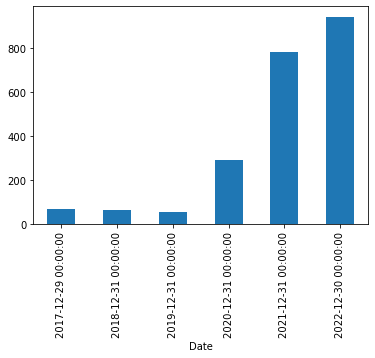

In [64]:
df_tesla['Open'].resample(rule='BA').mean().plot(kind='bar')

In [65]:
df_tesla['Open'].resample(rule='M').mean()

Date
2017-03-31      51.738100
2017-04-30      60.739579
2017-05-31      63.157545
2017-06-30      73.356455
2017-07-31      66.224200
                 ...     
2021-11-30    1117.766666
2021-12-31    1024.433180
2022-01-31    1019.310001
2022-02-28     878.368421
2022-03-31     867.419998
Freq: M, Name: Open, Length: 61, dtype: float64

<AxesSubplot:xlabel='Date'>

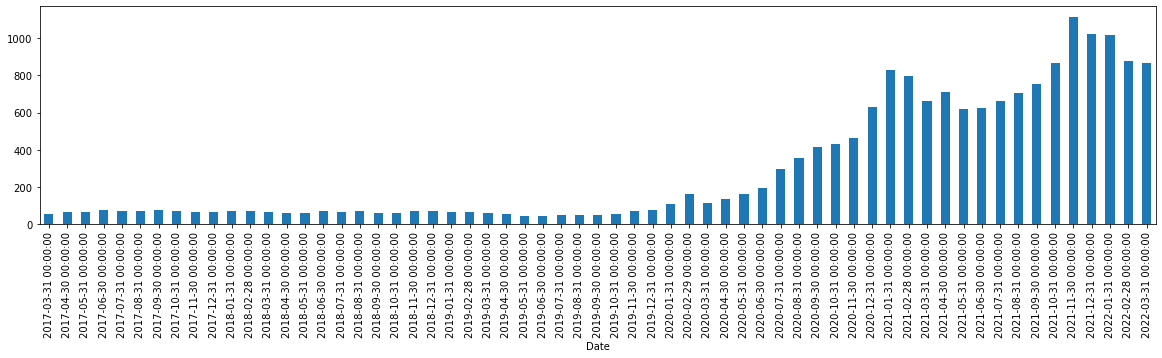

In [66]:
df_tesla['Open'].resample(rule='M').mean().plot(kind='bar',figsize=(20,4))

### Rolling and Expanding

In [67]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001
2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000
2017-03-10,49.299999,48.599998,49.242001,48.737999,15331500.0,48.737999


In [68]:
df_tesla['High'].head()

Date
2017-03-06    50.340000
2017-03-07    50.778000
2017-03-08    50.014000
2017-03-09    49.731998
2017-03-10    49.299999
Name: High, dtype: float64

In [69]:
df_tesla['High'].rolling()

TypeError: rolling() missing 1 required positional argument: 'window'

In [73]:
df_tesla['High'].rolling(10)
# It creates a window of 10 rows(axis=0) where it will not consider the centre value if center=False

# We can use any aggregrate function with rolling()

Rolling [window=10,center=False,axis=0,method=single]

In [74]:
df_tesla['High'].rolling(10).mean().head(20)

Date
2017-03-06        NaN
2017-03-07        NaN
2017-03-08        NaN
2017-03-09        NaN
2017-03-10        NaN
2017-03-13        NaN
2017-03-14        NaN
2017-03-15        NaN
2017-03-16        NaN
2017-03-17    50.9574
2017-03-20    51.2144
2017-03-21    51.4326
2017-03-22    51.5326
2017-03-23    51.7128
2017-03-24    52.0606
2017-03-27    52.5350
2017-03-28    52.9862
2017-03-29    53.3582
2017-03-30    53.6832
2017-03-31    53.9702
Name: High, dtype: float64

In [75]:
df_tesla['High'].rolling(5).mean().head(20)

Date
2017-03-06          NaN
2017-03-07          NaN
2017-03-08          NaN
2017-03-09          NaN
2017-03-10    50.032800
2017-03-13    49.838799
2017-03-14    50.007999
2017-03-15    50.445200
2017-03-16    51.128800
2017-03-17    51.882001
2017-03-20    52.590001
2017-03-21    52.857201
2017-03-22    52.620000
2017-03-23    52.296800
2017-03-24    52.239200
2017-03-27    52.480000
2017-03-28    53.115200
2017-03-29    54.096400
2017-03-30    55.069600
2017-03-31    55.701200
Name: High, dtype: float64

In [76]:
df_tesla['High'].rolling(5).max().head(20)

Date
2017-03-06          NaN
2017-03-07          NaN
2017-03-08          NaN
2017-03-09          NaN
2017-03-10    50.778000
2017-03-13    50.778000
2017-03-14    51.624001
2017-03-15    52.200001
2017-03-16    53.150002
2017-03-17    53.150002
2017-03-20    53.150002
2017-03-21    53.150002
2017-03-22    53.150002
2017-03-23    53.066002
2017-03-24    52.959999
2017-03-27    54.113998
2017-03-28    56.136002
2017-03-29    56.136002
2017-03-30    56.400002
2017-03-31    56.400002
Name: High, dtype: float64

In [77]:
df_tesla['Open:30DaysRolling'] = df_tesla['Open'].rolling(30).mean()

In [78]:
df_tesla.head(31)

,High,Low,Open,Close,Volume,Adj Close,Open:30DaysRolling
Date,,,,,,,
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001,NaN
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999,NaN
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001,NaN
2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000,NaN
2017-03-10,49.299999,48.599998,49.242001,48.737999,15331500.0,48.737999,NaN
2017-03-13,49.369999,48.556000,48.964001,49.234001,15113000.0,49.234001,NaN
2017-03-14,51.624001,49.203999,49.222000,51.599998,37992000.0,51.599998,NaN
2017-03-15,52.200001,50.854000,51.400002,51.146000,26654000.0,51.146000,NaN
2017-03-16,53.150002,51.812000,52.480000,52.410000,35661000.0,52.410000,NaN


<AxesSubplot:xlabel='Date'>

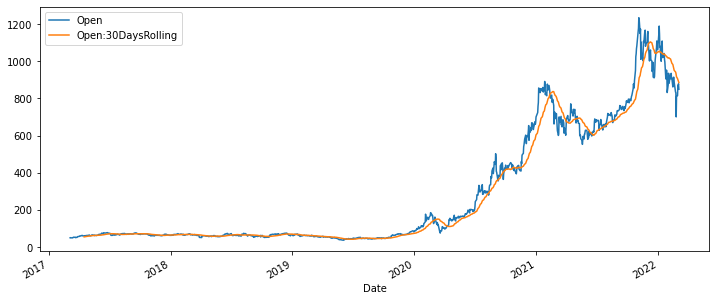

In [79]:
df_tesla[['Open', 'Open:30DaysRolling']].plot(figsize=(12,5))

In [80]:
# With rolling we can do graph smoothening as well